<a href="https://colab.research.google.com/github/Maulana527/TugasPertama/blob/main/tugas_kompe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

train.head()

ID    Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
0   1     Martin        727.0     Spain    Male  38.0       2   62276.99   
1   2  Chinweuba        529.0    France  Female  29.0       8       0.00   
2   3      Clapp        589.0    France  Female  50.0       4       0.00   
3   4       Boni        515.0    France    Male  40.0       0  109542.29   
4   5   Jamieson        528.0     Spain    Male  43.0       7   97473.87   

   NumOfProducts HasCrCard IsActiveMember  EstimatedSalary Complain  \
0              1       Yes            Yes         59280.79       No   
1              2       Yes            NaN         19842.11       No   
2              2        No            Yes        182076.97       No   
3              1       Yes            Yes        166370.81       No   
4              2       Yes            Yes        159823.16       No   

   Satisfaction Score Card Type  Point Earned  Exited  
0                   4   DIAMOND           757       0  
1                   3    SILVER           476       0  
2                   4  PLATINUM           441       0  
3                   5      GOLD           312       0  
4                   3  PLATINUM           654       0

In [ ]:
test.head()

ID    Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0  2001     Ugonna          693   Germany    Male   44       5  124601.58   
1  2002  Nebeolisa          607   Germany    Male   29       7  102609.00   
2  2003       Tsai          689     Spain    Male   73       1  108555.07   
3  2004     Downie          660    France  Female   38       5  110570.78   
4  2005   Morehead          503    France    Male   38       1       0.00   

   NumOfProducts HasCrCard IsActiveMember  EstimatedSalary Complain  \
0              2       Yes            Yes         46998.13      Yes   
1              1       Yes             No        163257.44       No   
2              1        No            Yes        167969.15       No   
3              2       Yes             No        195906.59       No   
4              2       Yes            Yes         95153.24       No   

   Satisfaction Score Card Type  Point Earned  
0                   2    SILVER           408  
1                   5   DIAMOND           800  
2                   1  PLATINUM           623  
3                   1    SILVER           472  
4                   2   DIAMOND           433

In [ ]:
print(f'Train columns: {train.columns}')
print(f'Test columns: {test.columns}')

Train columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned', 'Exited'],
      dtype='object')
Test columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [ ]:
train.info()

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

In [ ]:
numerical_cols = [var for var in train.columns if train[var].dtype != 'object'] # get the numerical columns
categorical_cols = [var for var in train.columns if train[var].dtype == 'object'] # get the categorical columns

print('Numerical columns:')
print(numerical_cols)

Numerical columns:
['ID', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Exited']


In [ ]:
print('Categorical columns:')
print(categorical_cols)

Categorical columns:
['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']


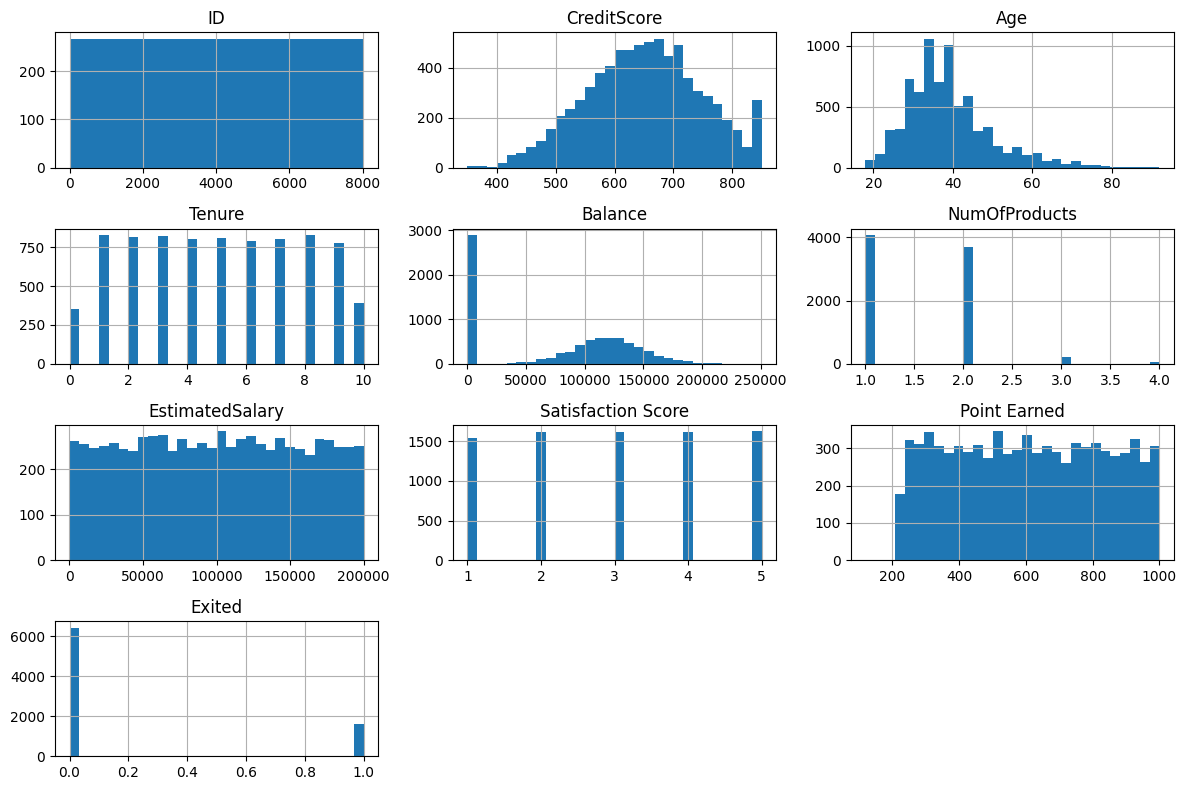

In [ ]:
train[numerical_cols].hist(bins=30, figsize=(12,8));
plt.tight_layout()
plt.show()

In [ ]:
categorical_cols

['Surname',
 'Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'Complain',
 'Card Type']

In [ ]:
# Removing 'Surname' from categorical_cols
k = 'Surname'

while(k in categorical_cols):
    categorical_cols.remove(k)

categorical_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']

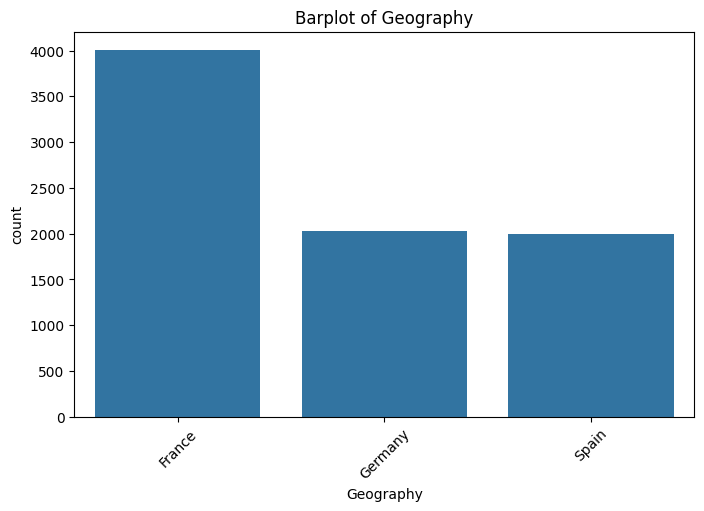

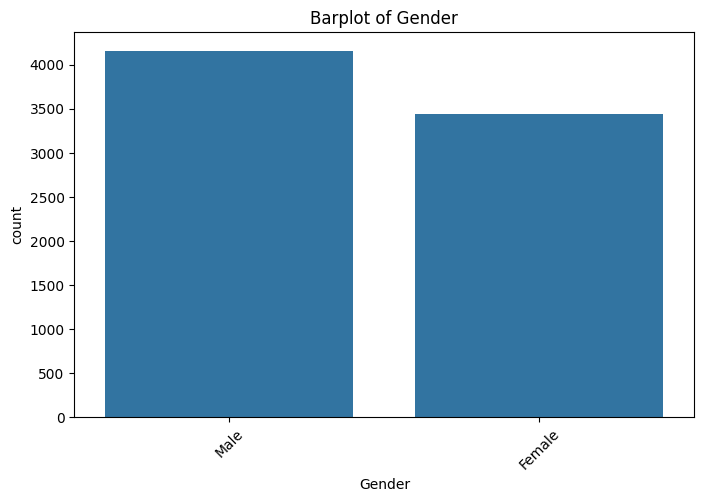

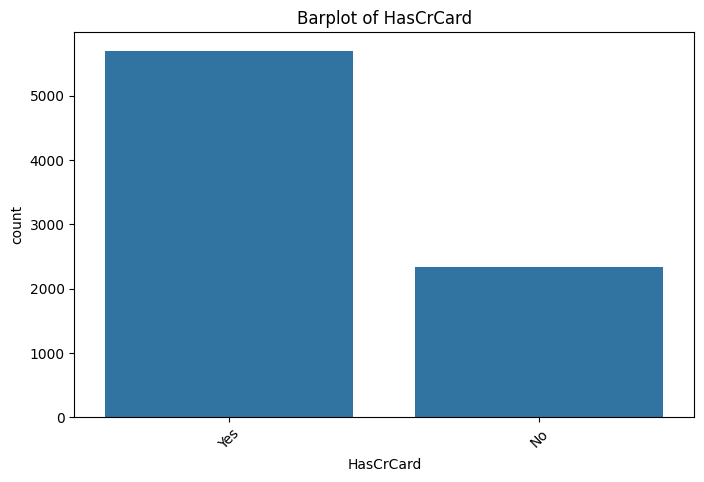

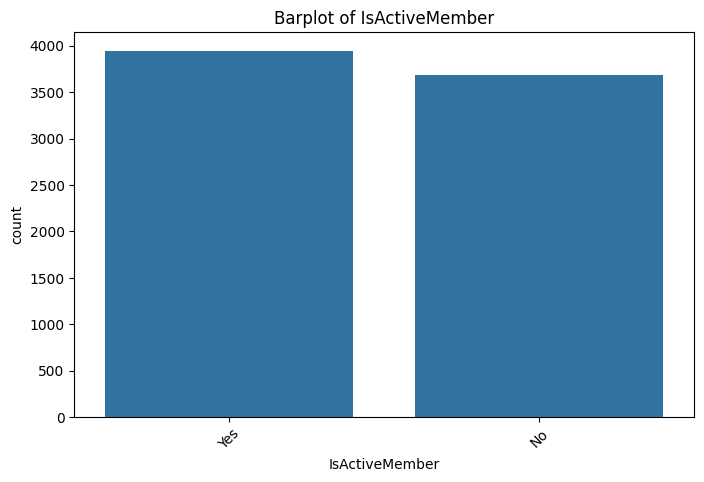

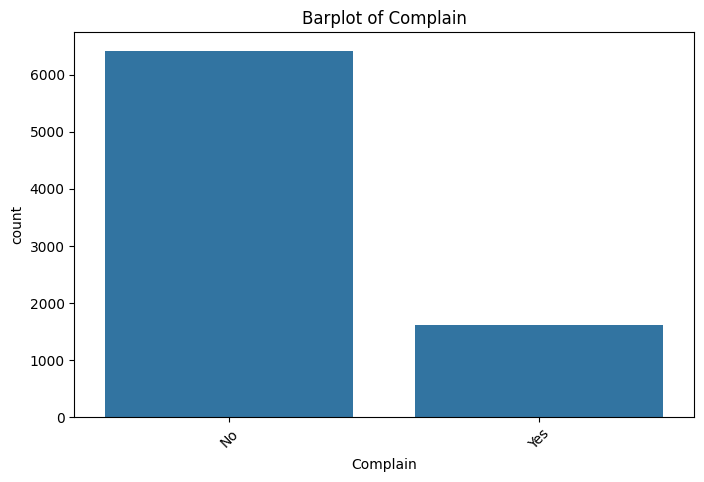

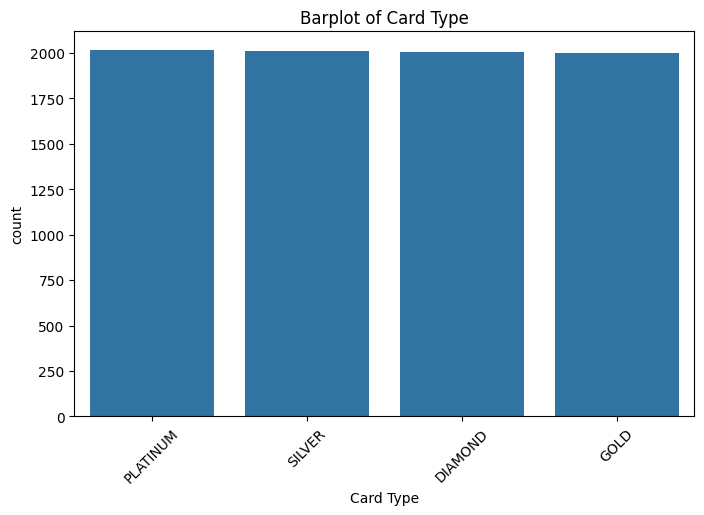

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'Barplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
train2 = train.copy() # copy the original dataframe

for col in categorical_cols:
    le = LabelEncoder()

    train2[col] = le.fit_transform(train2[col])

train2.head()

ID    Surname  CreditScore  Geography  Gender   Age  Tenure    Balance  \
0   1     Martin        727.0          2       1  38.0       2   62276.99   
1   2  Chinweuba        529.0          0       0  29.0       8       0.00   
2   3      Clapp        589.0          0       0  50.0       4       0.00   
3   4       Boni        515.0          0       1  40.0       0  109542.29   
4   5   Jamieson        528.0          2       1  43.0       7   97473.87   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Complain  \
0              1          1               1         59280.79         0   
1              2          1               2         19842.11         0   
2              2          0               1        182076.97         0   
3              1          1               1        166370.81         0   
4              2          1               1        159823.16         0   

   Satisfaction Score  Card Type  Point Earned  Exited  
0                   4          0           757       0  
1                   3          3           476       0  
2                   4          2           441       0  
3                   5          1           312       0  
4                   3          2           654       0

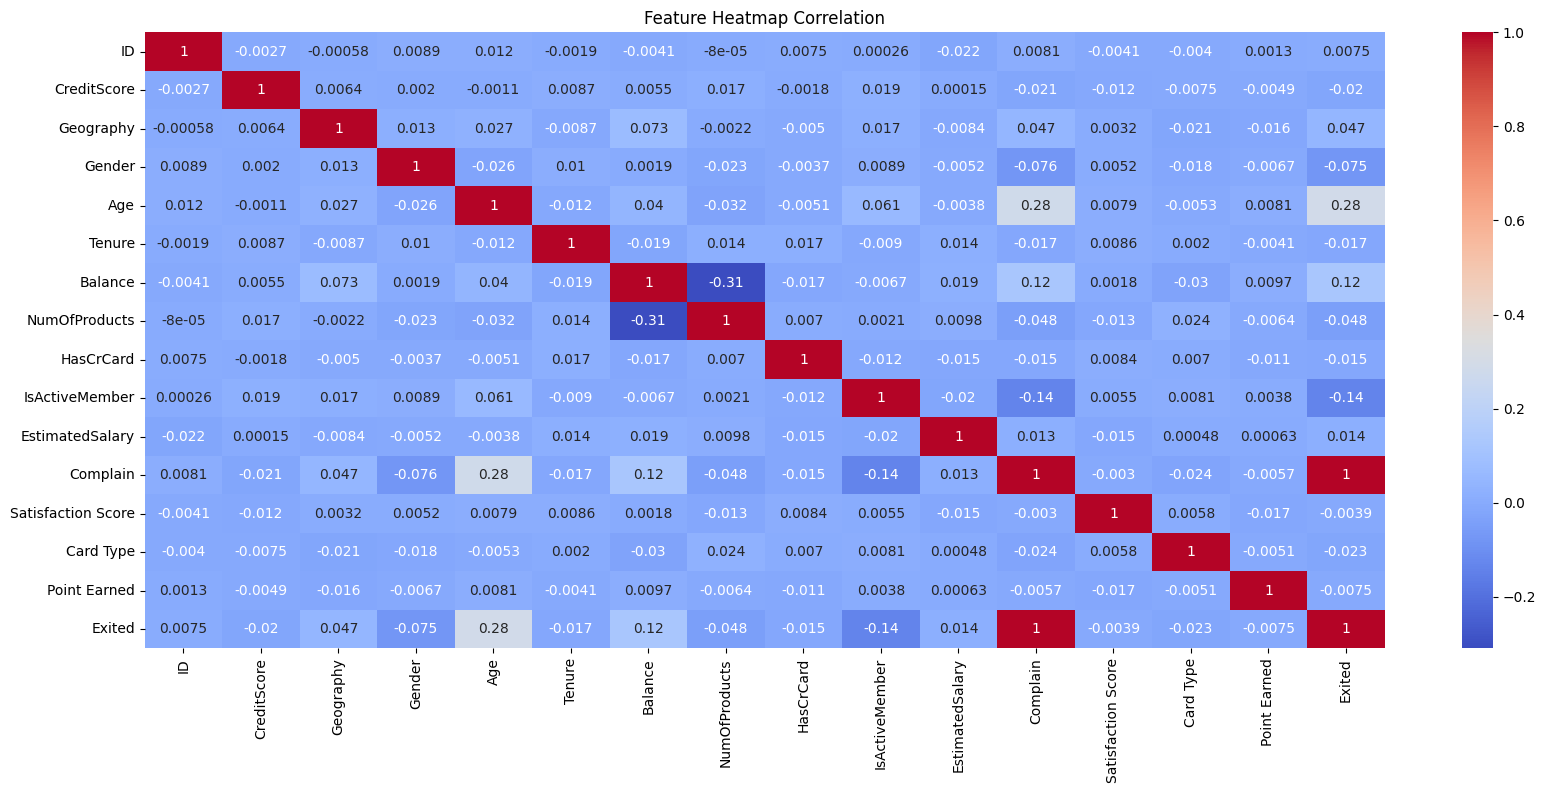

In [ ]:
num_corr = train2.drop('Surname', axis=1).corr()

plt.figure(figsize=(20,8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm')
plt.title('Feature Heatmap Correlation')
plt.show()

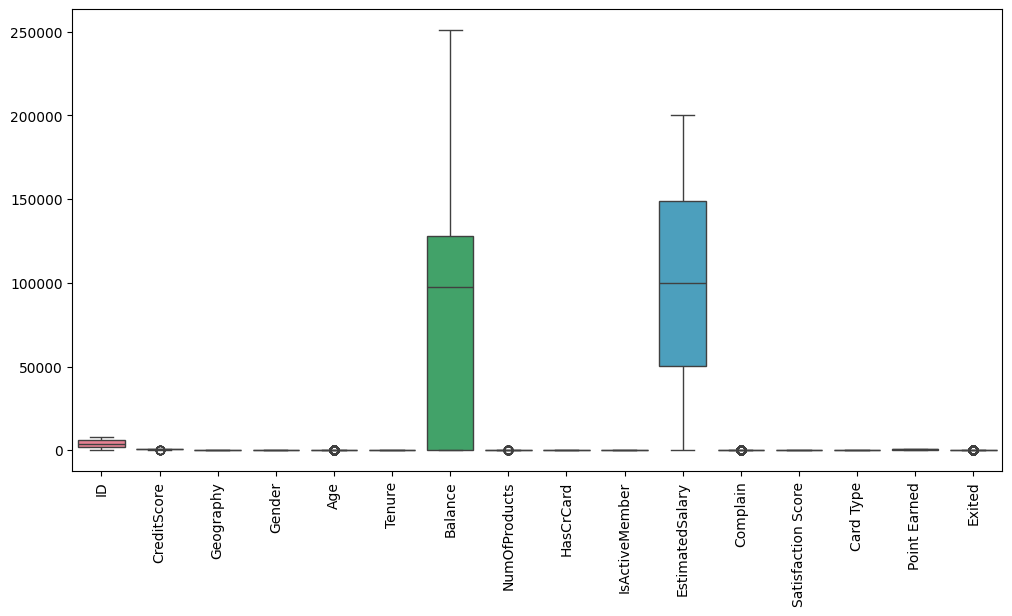

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train2)
plt.xticks(rotation=90)  # Rotasi label sumbu X agar lebih mudah dibaca
plt.show()

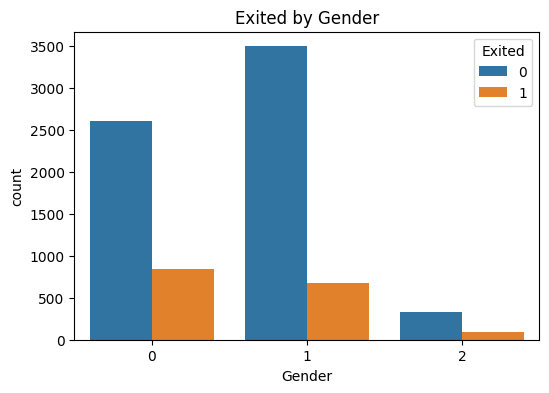

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Exited', data=train2)
plt.title('Exited by Gender')
plt.show()

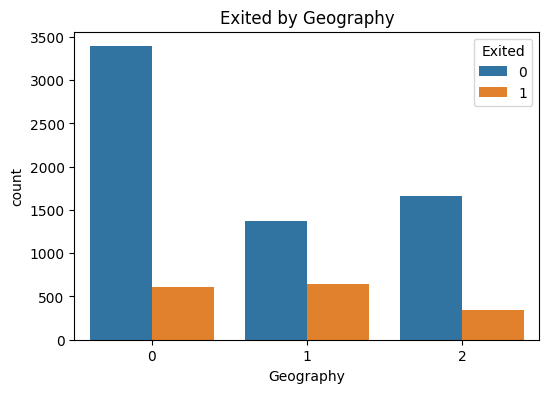

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Geography', hue='Exited', data=train2)
plt.title('Exited by Geography')
plt.show()

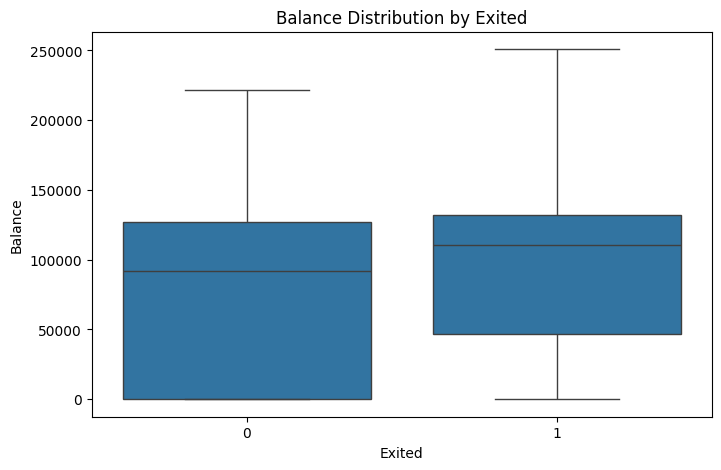

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Balance', data=train2)
plt.title('Balance Distribution by Exited')
plt.show()

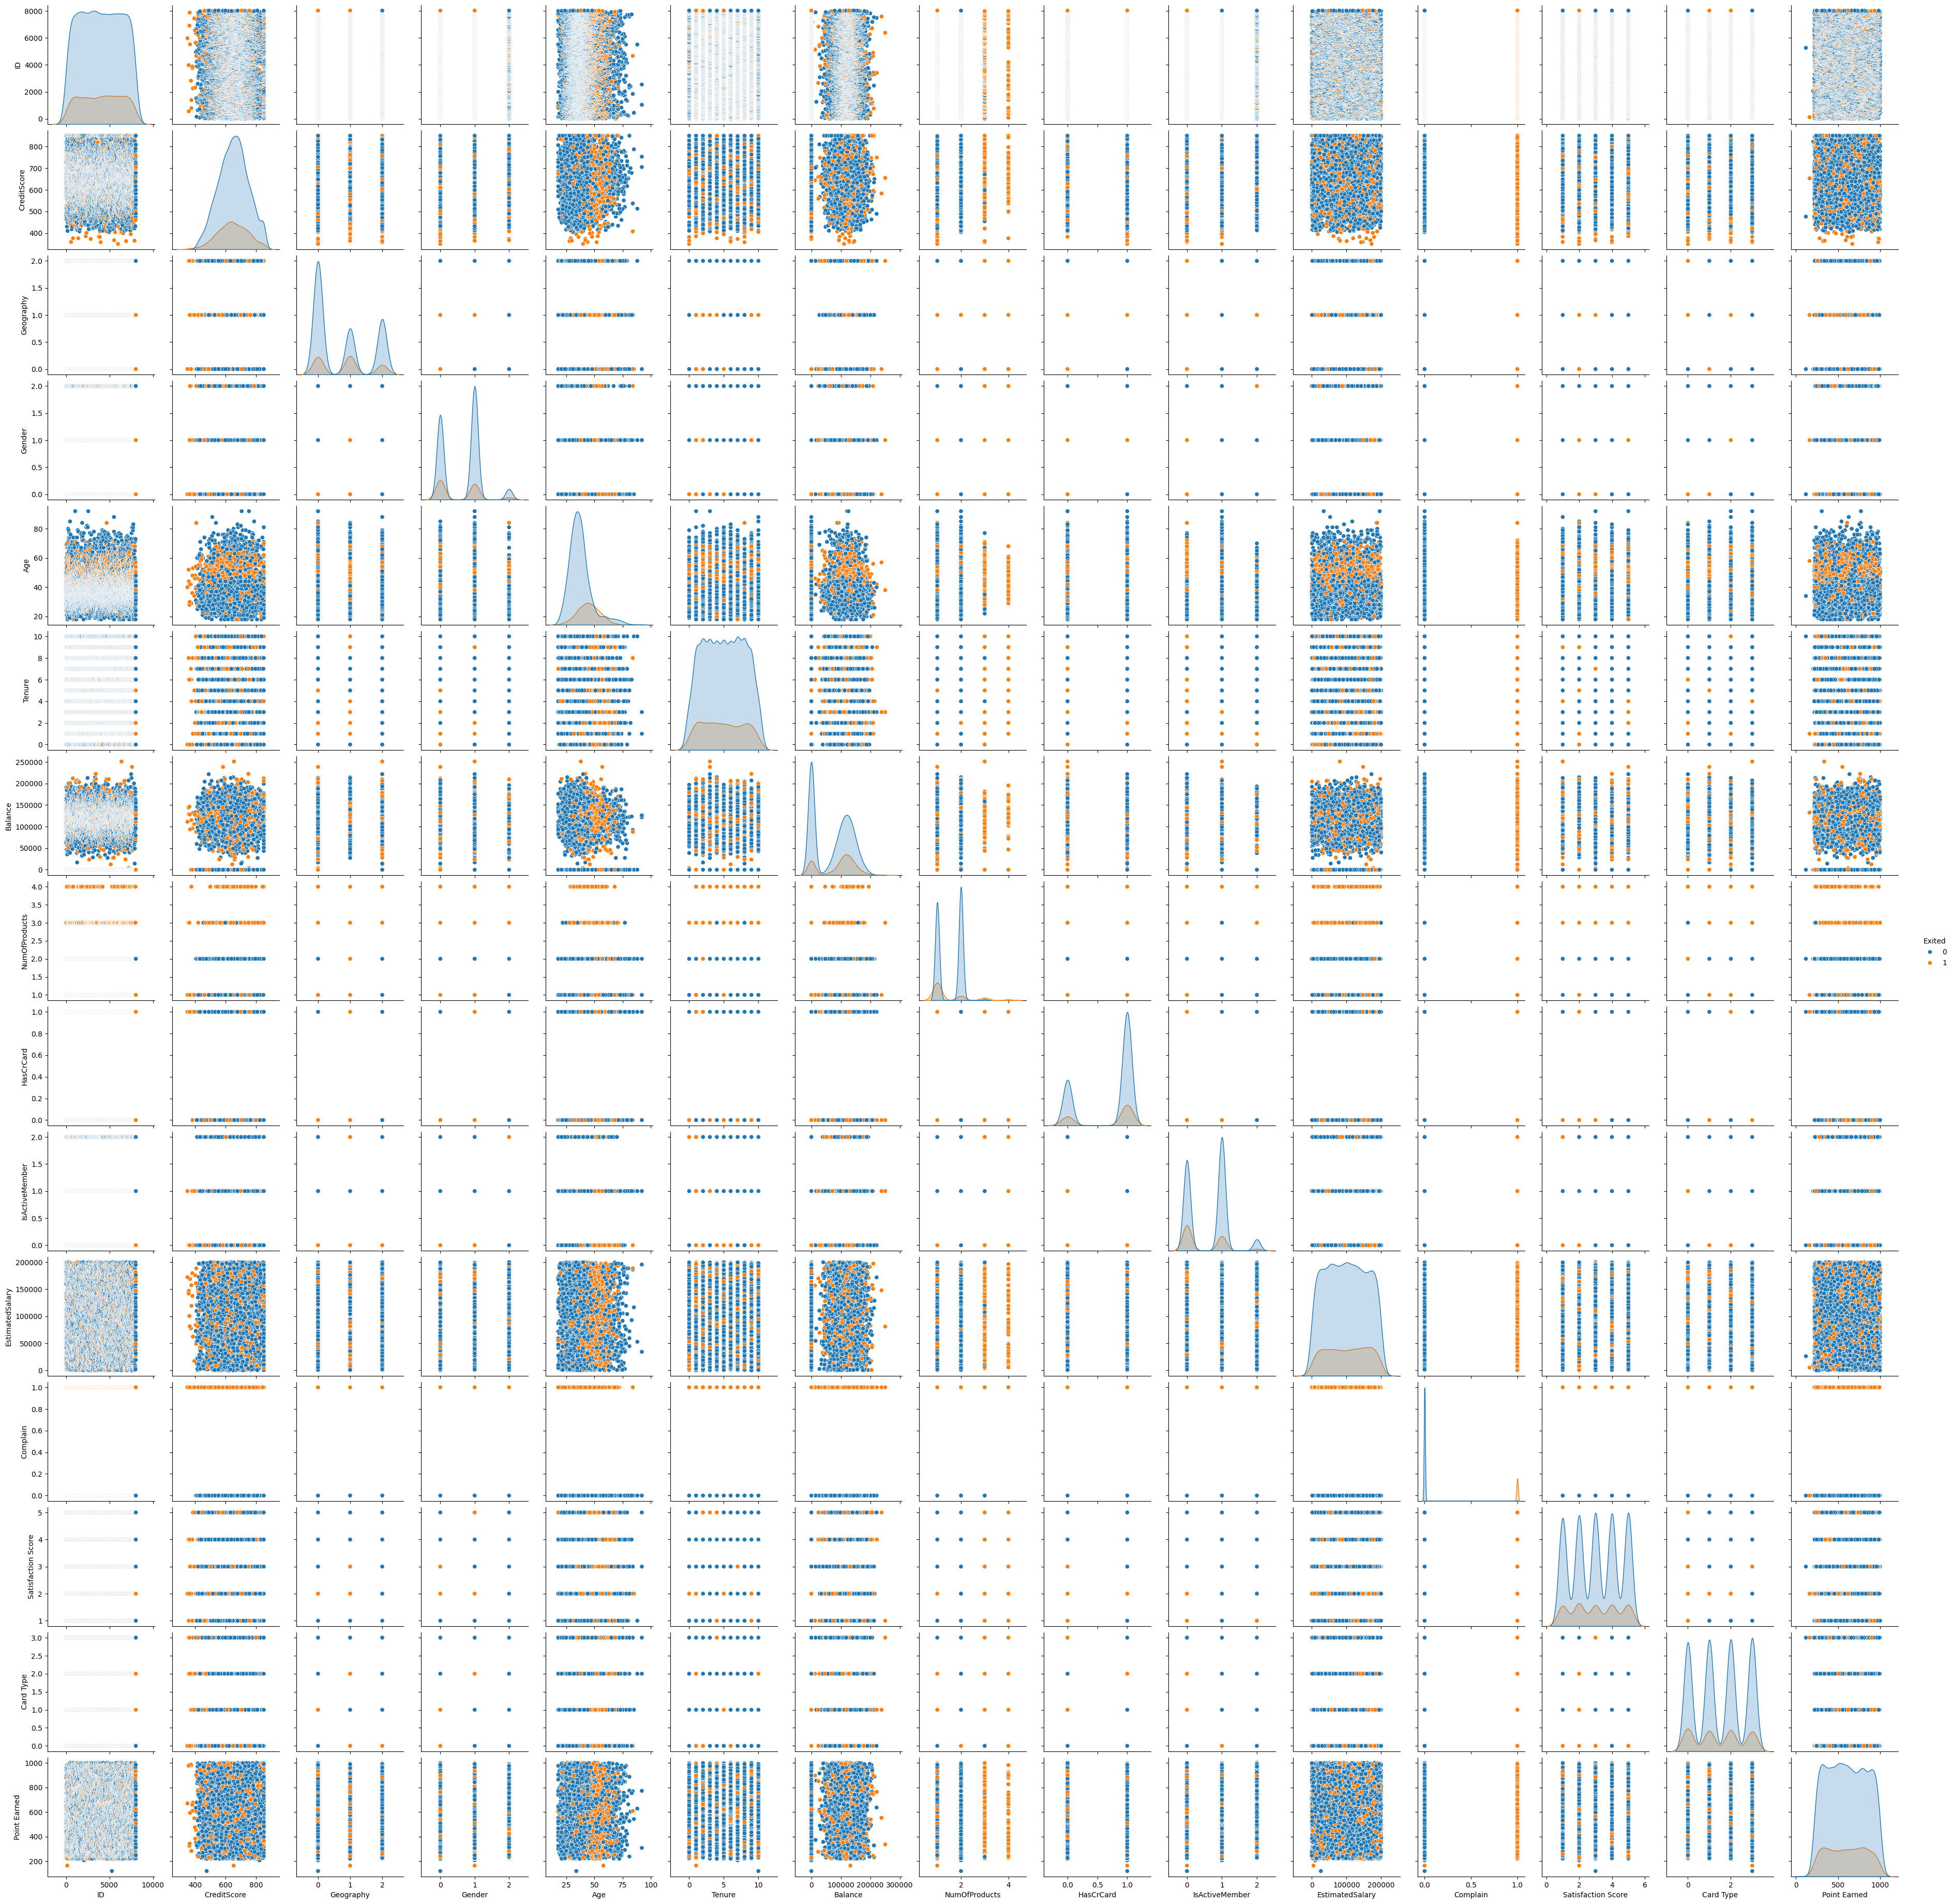

In [ ]:
sns.pairplot(train2, hue='Exited')
plt.show()

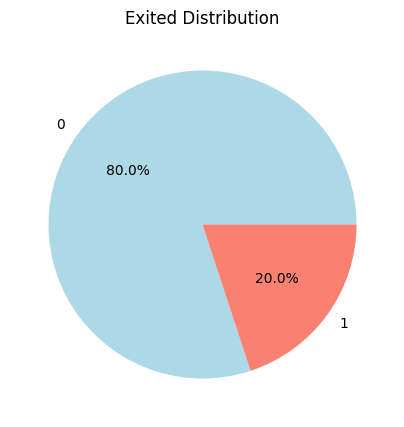

In [ ]:
plt.figure(figsize=(5, 5))
train2['Exited'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Exited Distribution')
plt.ylabel('')
plt.show()

In [ ]:
train.isna().sum().sort_values(ascending=False)

Age                   442
CreditScore           427
Gender                423
IsActiveMember        402
EstimatedSalary       366
ID                      0
Point Earned            0
Card Type               0
Satisfaction Score      0
Complain                0
NumOfProducts           0
HasCrCard               0
Surname                 0
Balance                 0
Tenure                  0
Geography               0
Exited                  0
dtype: int64

In [ ]:
test.isna().sum().sort_values(ascending=False)

ID                    0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

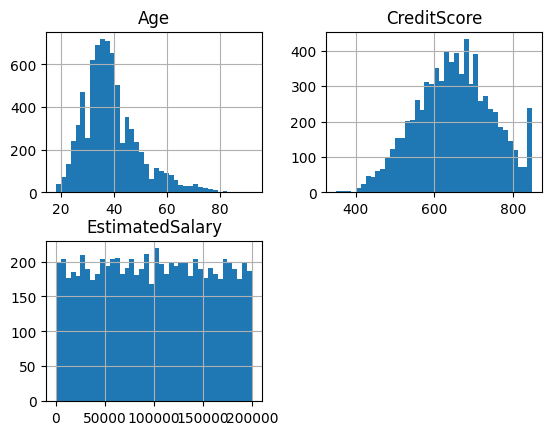

In [ ]:
train[['Age', 'CreditScore', 'EstimatedSalary']].hist(bins=40);

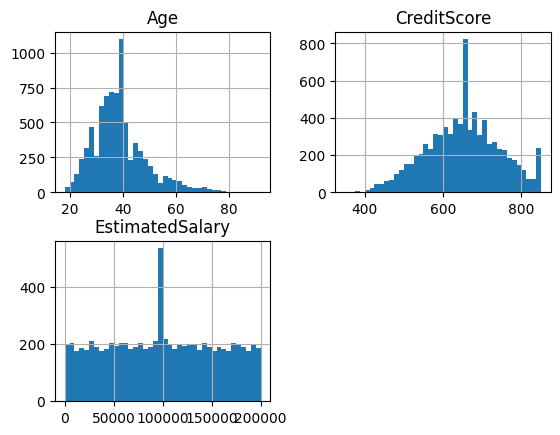

In [ ]:
# Filling missing values
for col in ['Age', 'CreditScore', 'EstimatedSalary']:
    train[col].fillna(train[col].mean(), inplace=True)

train[['Age', 'CreditScore', 'EstimatedSalary']].hist(bins=40);

In [ ]:
train.isna().sum().sort_values(ascending=False)

Gender                423
IsActiveMember        402
ID                      0
HasCrCard               0
Point Earned            0
Card Type               0
Satisfaction Score      0
Complain                0
EstimatedSalary         0
NumOfProducts           0
Surname                 0
Balance                 0
Tenure                  0
Age                     0
Geography               0
CreditScore             0
Exited                  0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
for col in categorical_cols:
    print(train[col].value_counts())
    print('-'*50)

Geography
France     4006
Germany    2027
Spain      1997
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      4162
Female    3445
Name: count, dtype: int64
--------------------------------------------------
HasCrCard
Yes    5700
No     2330
Name: count, dtype: int64
--------------------------------------------------
IsActiveMember
Yes    3948
No     3680
Name: count, dtype: int64
--------------------------------------------------
Complain
No     6422
Yes    1608
Name: count, dtype: int64
--------------------------------------------------
Card Type
PLATINUM    2017
SILVER      2010
DIAMOND     2003
GOLD        2000
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
le = LabelEncoder()

for col in categorical_cols:
    le = LabelEncoder()

    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col]) # dont forget to apply it to the test column too!

train.head()

ID    Surname  CreditScore  Geography  Gender   Age  Tenure    Balance  \
0   1     Martin        727.0          2       1  38.0       2   62276.99   
1   2  Chinweuba        529.0          0       0  29.0       8       0.00   
2   3      Clapp        589.0          0       0  50.0       4       0.00   
3   4       Boni        515.0          0       1  40.0       0  109542.29   
4   5   Jamieson        528.0          2       1  43.0       7   97473.87   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Complain  \
0              1          1               1         59280.79         0   
1              2          1               2         19842.11         0   
2              2          0               1        182076.97         0   
3              1          1               1        166370.81         0   
4              2          1               1        159823.16         0   

   Satisfaction Score  Card Type  Point Earned  Exited  
0                   4          0           757       0  
1                   3          3           476       0  
2                   4          2           441       0  
3                   5          1           312       0  
4                   3          2           654       0

In [ ]:
test.head()

ID    Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0  2001     Ugonna          693          1       1   44       5  124601.58   
1  2002  Nebeolisa          607          1       1   29       7  102609.00   
2  2003       Tsai          689          2       1   73       1  108555.07   
3  2004     Downie          660          0       0   38       5  110570.78   
4  2005   Morehead          503          0       1   38       1       0.00   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Complain  \
0              2          1               1         46998.13         1   
1              1          1               0        163257.44         0   
2              1          0               1        167969.15         0   
3              2          1               0        195906.59         0   
4              2          1               1         95153.24         0   

   Satisfaction Score  Card Type  Point Earned  
0                   2          3           408  
1                   5          0           800  
2                   1          2           623  
3                   1          3           472  
4                   2          0           433

In [ ]:
train.drop(['ID', 'Surname'], axis=1, inplace=True)

X = train.drop('Exited',axis=1) # features
y = train['Exited'] # target

X_train, X_val, y_train, y_val = train_test_split(
    X, # features
    y, # target
    test_size = 0.2, # test size for validation data 20%, 80% for train data
    random_state=42 # so that the result is fixed, because splitting data is actually random. you must use random_state!
)


X_train.shape, y_train.shape, X_val.shape, y_val.shape

((6424, 14), (6424,), (1606, 14), (1606,))

In [ ]:
le_geo = LabelEncoder()
train['Geography'] = le_geo.fit_transform(train['Geography']) # Changed df to train

le_gender = LabelEncoder()
train['Gender'] = le_gender.fit_transform(train['Gender']) # Changed df to train

# Pisahkan fitur (X) dan target (y)
X = train.drop(columns=['Exited'])  # Semua fitur kecuali 'Churn'
y = train['Exited']  # Target

# Bagi data menjadi training (80%) & testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (6424, 14)
Testing size: (1606, 14)


In [ ]:
# Inisialisasi dan latih model DecisionTree
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report # import accuracy_score and classification_report

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = dt_model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Decision Tree: {accuracy:.2f}")

# Laporan Klasifikasi
print(classification_report(y_test, y_pred))

Akurasi Model Decision Tree: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       0.99      1.00      1.00       308

    accuracy                           1.00      1606
   macro avg       1.00      1.00      1.00      1606
weighted avg       1.00      1.00      1.00      1606



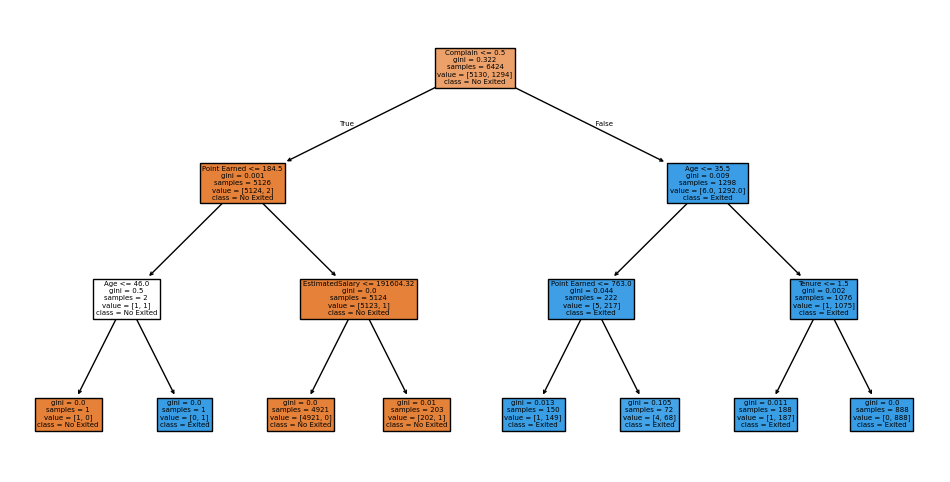

In [ ]:
plt.figure(figsize=(12, 6))
from sklearn import tree # import the 'tree' module from sklearn
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No Exited', 'Exited'], filled=True)
plt.show()

In [ ]:
test.drop(['ID', 'Surname'], axis=1, inplace=True)

test.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          693          1       1   44       5  124601.58              2   
1          607          1       1   29       7  102609.00              1   
2          689          2       1   73       1  108555.07              1   
3          660          0       0   38       5  110570.78              2   
4          503          0       1   38       1       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
0          1               1         46998.13         1                   2   
1          1               0        163257.44         0                   5   
2          0               1        167969.15         0                   1   
3          1               0        195906.59         0                   1   
4          1               1         95153.24         0                   2   

   Card Type  Point Earned  
0          3           408  
1          0           800  
2          2           623  
3          3           472  
4          0           433

In [ ]:
# Assuming dt_model is your trained Decision Tree model
test['Exited'] = dt_model.predict(test) # predict and add 'Exited' column on test data

test.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          693          1       1   44       5  124601.58              2   
1          607          1       1   29       7  102609.00              1   
2          689          2       1   73       1  108555.07              1   
3          660          0       0   38       5  110570.78              2   
4          503          0       1   38       1       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
0          1               1         46998.13         1                   2   
1          1               0        163257.44         0                   5   
2          0               1        167969.15         0                   1   
3          1               0        195906.59         0                   1   
4          1               1         95153.24         0                   2   

   Card Type  Point Earned  Exited  
0          3           408       1  
1          0           800       0  
2          2           623       0  
3          3           472       0  
4          0           433       0

In [ ]:
test['Exited'].value_counts()

Exited
0    1556
1     444
Name: count, dtype: int64

In [ ]:
submission = pd.read_csv('/content/sample_data/sample_submission.csv')


submission

ID  Exited
0     2001       1
1     2002       0
2     2003       0
3     2004       1
4     2005       0
...    ...     ...
1995  3996       1
1996  3997       0
1997  3998       1
1998  3999       0
1999  4000       0

[2000 rows x 2 columns]

In [ ]:
# replace the 'Exited' column in the submission file with the prediction result column in our test data
submission['Exited'] = test['Exited']

submission

ID  Exited
0     2001       1
1     2002       0
2     2003       0
3     2004       0
4     2005       0
...    ...     ...
1995  3996       1
1996  3997       0
1997  3998       0
1998  3999       0
1999  4000       0

[2000 rows x 2 columns]

In [ ]:
submission.to_csv('Tugas_Pertama_Saya.csv', index=False) # save the submission file to CSV